# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [1]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [2]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [3]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

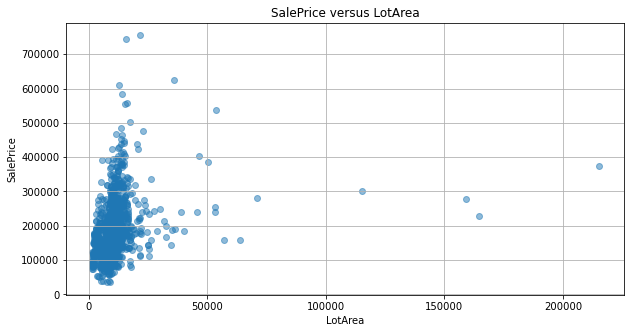

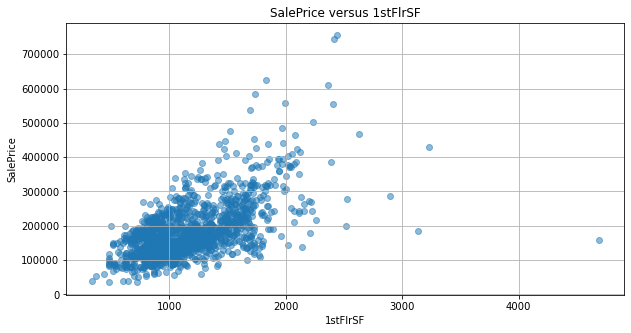

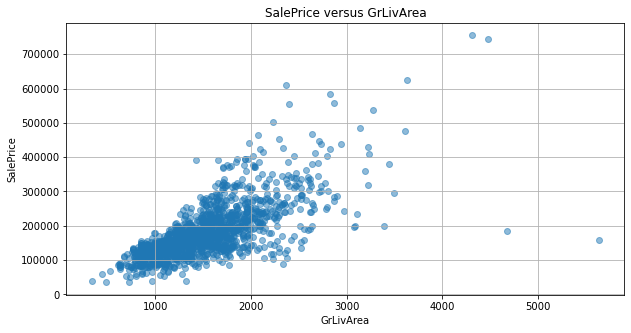

In [5]:
# Your code here - import relevant library, create scatter plots
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

#new subset
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()

#list of variables to plot against saleprice
IndVariables = ['LotArea', '1stFlrSF', 'GrLivArea']

#plotting our scatter plot
for variable in IndVariables:
    plt.figure(figsize = (10,5))
    plt.scatter(ames_subset[variable],ames_subset['SalePrice'],alpha = 0.5)
    plt.title(f'SalePrice versus {variable}')
    plt.xlabel(variable)
    plt.ylabel('SalePrice')
    plt.grid(True)
    plt.show()


In [6]:
# Your written answer here - do these seem like good candidates for linear regression?
"""The scatter plot of sale price versus Lot area is not linear,,seems to be a bad idea to use it for linear regression.
   The scatter plot for saleprice vs GrLivArea and saleprice vs 1stFlrSF seems to be a good idea to use for linear regression.
"""

'The scatter plot of sale price versus Lot area is not linear,,seems to be a bad idea to use it for linear regression.\n   The scatter plot for saleprice vs GrLivArea and saleprice vs 1stFlrSF seems to be a good idea to use for linear regression.\n'

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [7]:
# Your code here - define y and baseline X
#defining x and y variables
X_baseline = ames['GrLivArea']
y = ames['SalePrice']

In [8]:
# Your code here - import StatsModels, fit baseline model, display results
import statsmodels.api as sm

#creating the model and add a constant
baseline_model = sm.OLS(y,sm.add_constant(X_baseline))
#fitting the nmodel
baseline_results = baseline_model.fit()
print(baseline_results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          4.52e-223
Time:                        19:55:52   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

In [9]:
# Your written answer here - interpret model results
"""The dependent variable is SalePrice indicating that the model aims to predict house sale prices.
   The type of model used is Ordinary Least Squares regression.
   The method used is least squares.
   R squared value is 0.502 indicates that 50.2% of the variance in SalePrice can be explained by the model using GrLivArea as a predictor.
   F static value is 1471 this indicates that the model is statistically significanmt.
   The p value is small(close to zero) indicating that the model is statistically significant.meaning we can reject the null hypothesis.
   The intercept of the model is approxmately(18570) this represents the estimated average sale price when GrLivArea is zero.
   The coefficient for the GrLivArea predictor is 107.1304 this indicates that for every additional square foot of above ground living area,the sale price increases by approximately $107.13 holding all else constant.
   
"""

'The dependent variable is SalePrice indicating that the model aims to predict house sale prices.\n   The type of model used is Ordinary Least Squares regression.\n   The method used is least squares.\n   R squared value is 0.502 indicates that 50.2% of the variance in SalePrice can be explained by the model using GrLivArea as a predictor.\n   F static value is 1471 this indicates that the model is statistically significanmt.\n   The p value is small(close to zero) indicating that the model is statistically significant.meaning we can reject the null hypothesis.\n   The intercept of the model is approxmately(18570) this represents the estimated average sale price when GrLivArea is zero.\n   The coefficient for the GrLivArea predictor is 107.1304 this indicates that for every additional square foot of above ground living area,the sale price increases by approximately $107.13 holding all else constant.\n   \n'

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [10]:
# Your code here - define X
#defining X and y variable
X_all = ames[['LotArea', '1stFlrSF', 'GrLivArea']]
y = ames['SalePrice']

In [12]:
# Your code here - fit model and display results
#creating a model and adding X constant
second_model =sm.OLS(y,sm.add_constant(X_all))
#fitting the model
second_model_results = second_model.fit()
print(second_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          1.57e-262
Time:                        13:46:02   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

In [ ]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

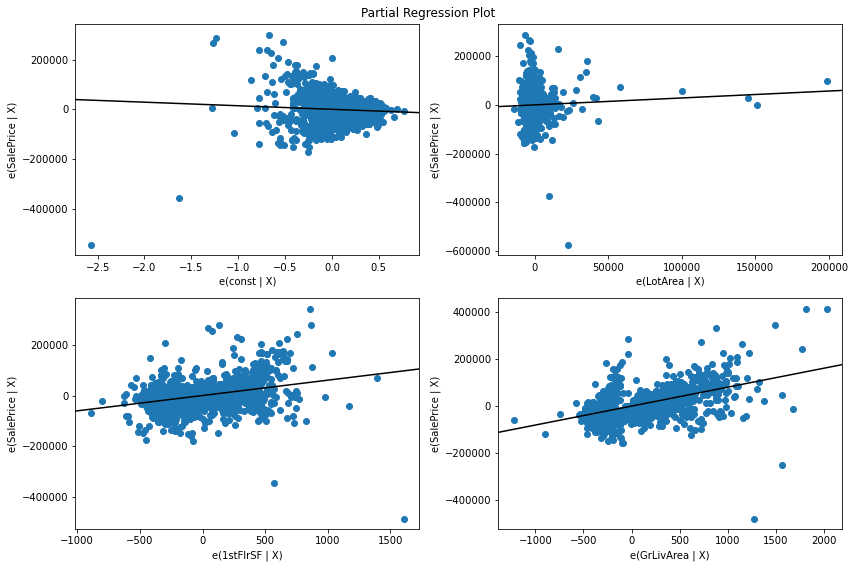

In [13]:
# Your code here - create partial regression plots for each predictor
import statsmodels.api as sm
import matplotlib.pyplot as plt

#partial regression plot for each feature
fig = plt.figure(figsize = (12,8))

#create a partial progression plot
sm.graphics.plot_partregress_grid(second_model_results,fig=fig)

plt.show()

In [14]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?
"""The plot of sale price versus 1stFlrSF and sale price versus GrLivArea show a positive relationship though the graph of sale price vs GrLivArea has a somewhat stronger upward slope compared to the bottom left plot.
   The points are more dispersed indicating a degree of variability but the positive relationship is evident.
   
"""

'The plot of sale price versus 1stFlrSF and sale price versus GrLivArea show a positive relationship though the graph of sale price vs GrLivArea has a somewhat stronger upward slope compared to the bottom left plot.\n   The points are more dispersed indicating a degree of variability but the positive relationship is evident.\n   \n'

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [17]:
# Your code here - import linear regression from scikit-learn and create and fit model
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#fitting the model with scikit-learn
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]#independent variables
y = ames_subset['SalePrice']#dependent variable

#creating the model
model = LinearRegression()
model.fit(X,y)#fitting the model

LinearRegression()

In [18]:
# Your code here - compare R-Squared
#get the r squared value
r_squared = model.score(X,y)
#print the r squared value
print("R-squared:",r_squared)

R-squared: 0.5649801771384368


In [19]:
# Your code here - compare intercept and coefficients
print("Coefficients:",model.coef_)
print("Intercept:",model.intercept_)

Coefficients: [ 0.28413359 60.28664625 80.60605834]
Intercept: -14313.408857494564


## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.